RNN Example

Epoch 1/20
25/25 [==============================] - 2s 16ms/step - loss: 0.9544 - val_loss: 0.8889
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.9224 - val_loss: 0.8690
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.9084 - val_loss: 0.8595
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.9008 - val_loss: 0.8540
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.8953 - val_loss: 0.8495
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.8910 - val_loss: 0.8452
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.8871 - val_loss: 0.8407
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.8830 - val_loss: 0.8366
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.8784 - val_loss: 0.8316
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.8727 - val_loss: 0.8262
Epoch 11/20
25/25 

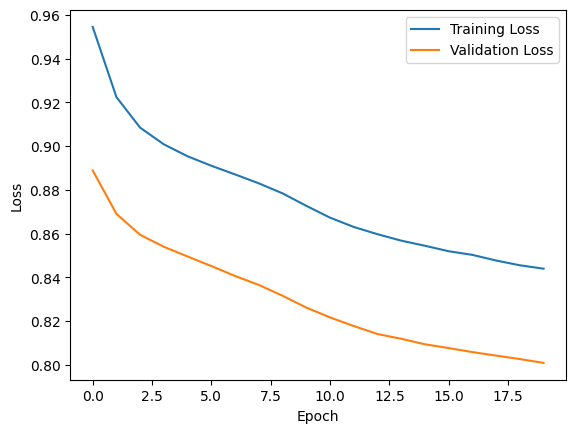

1/1 [==============================] - 0s 166ms/step
Test Data:
[[-0.67849473 -0.30549946 -0.59738106  0.11041805  1.19717853 -0.77104216
   1.0008205  -0.78167207 -0.84762721  0.81859462]
 [ 0.92193638  0.85140994 -1.31579741 -0.46595098  0.82298859  0.04154184
  -1.07369285  0.45831794 -0.71480726  1.79452485]
 [ 1.54484146  0.60409743  1.3610067   0.06479135  0.76543749  1.4777203
   0.24549868 -0.25518717 -1.70462196 -0.08313353]
 [ 0.82342318  0.94563343  0.50436507 -0.54129909 -1.97682157 -0.4952151
  -0.30434487 -0.31292897  0.61855636  1.98567641]
 [ 0.1235292  -0.21673179 -0.25922181  0.12438477 -0.82829376  0.12019856
   0.45081234  0.20968606  0.45754193  0.43374761]
 [-1.77189668  0.63687016 -0.67101485 -1.09583916 -1.10445183  0.43354161
  -0.22257493 -1.68196878  0.47803782 -1.43960813]
 [ 0.13982136  0.23849893  0.88557708  1.78168479 -1.36467633 -0.05247386
  -0.2763353   0.43374969  0.21566877 -0.35254624]
 [-0.44090219 -1.11645086  0.98786158  0.45920418  0.9177682  -

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic time series data
np.random.seed(42)
num_samples = 1000
time_steps = 10
input_dim = 1

data = np.random.randn(num_samples, time_steps, input_dim)

# Create target labels (next value in the sequence)
target = np.roll(data, shift=-1, axis=1)
target[:, -1, :] = 0  # Setting the last target value to 0

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(time_steps, input_dim), activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(data, target, epochs=20, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
test_data = np.random.randn(10, time_steps, input_dim)  # New data for prediction
predictions = model.predict(test_data)

print("Test Data:")
print(test_data[:, :, 0])
print("Predictions:")
print(predictions[:, 0])

LSTM

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate some example sequential data
sequence_length = 10
num_samples = 1000
input_dim = 1

X = np.random.random((num_samples, sequence_length, input_dim))
y = np.sum(X, axis=1)  # Sum along the sequence axis

# Build the LSTM model
model = Sequential([
    LSTM(units=8, input_shape=(sequence_length, input_dim)),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Generate predictions for new data
new_data = np.random.random((10, sequence_length, input_dim))
predictions = model.predict(new_data)

print("Predictions:", predictions)

Epoch 1/10
32/32 [==============================] - 3s 6ms/step - loss: 26.1767
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 23.7167
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 19.9975
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 14.2885
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 8.2326
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 4.6957
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 2.9617
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 2.0678
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 1.5591
Epoch 10/10
1/1 [==============================] - 0s 421ms/step
Predictions: [[4.5190597]
 [4.535871 ]
 [4.52448  ]
 [4.535703 ]
 [4.531472 ]
 [4.533403 ]
 [4.52984  ]
 [4.5174627]
 [4.532594 ]
 [4.5406322]]


RNN for text generation

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Example text data
text = "hello world"
chars = sorted(list(set(text)))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
num_chars = len(chars)

# Convert text to sequences of indices
seq_length = 3
input_seqs = []
target_seqs = []
for i in range(len(text) - seq_length):
    input_seq = text[i:i+seq_length]
    target_seq = text[i+seq_length]
    input_seqs.append([char_to_idx[char] for char in input_seq])
    target_seqs.append(char_to_idx[target_seq])

X = np.array(input_seqs)
y = np.array(target_seqs)

# Build the RNN model
model = Sequential([
    SimpleRNN(units=16, input_shape=(seq_length, 1)),  # Note: input_dim should be 1
    Dense(num_chars, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=1)

# Generate text using the trained model
start_sequence = "hel"
generated_text = start_sequence
for _ in range(10):
    input_seq = np.array([[char_to_idx[char] for char in start_sequence]])
    predicted_idx = model.predict(input_seq).argmax()
    generated_char = idx_to_char[predicted_idx]
    generated_text += generated_char
    start_sequence = generated_text[-seq_length:]

print("Generated Text:", generated_text)


Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 2.5334
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4517
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3789
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3173
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2688
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2065
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1535
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 2.1031
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 2.0595
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 2.0161
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9844
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9409
Epoch 13/100
8/8 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 42ms/step
Generated Text: hellollllllll
